# **Zadanie č.2 (I-SUNS)**


## **Príprava dát:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import residuals_plot
import locale as loc
import ast

pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_df = pd.read_csv('/content/drive/MyDrive/SUNS/datasets/z2_train.csv')
test_data_df = pd.read_csv('/content/drive/MyDrive/SUNS/datasets/z2_test.csv')

---
### **Trénovacie dáta:**

#### **Povodné dáta:**

In [ ]:
train_data_df

MSSubClass  LotFrontage  LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0            90         87.0     9246            5       1973          1973   
1            60        104.0    21535            6       1994          1995   
2            60         86.0    10380            5       1986          1987   
3            50         52.0     6240            6       1934          1950   
4            20         74.0     8532            6       1954          1990   
..          ...          ...      ...          ...        ...           ...   
935          30         40.0     4280            6       1913          2002   
936          20         61.0     7943            5       1961          1961   
937          20        141.0    31770            5       1960          1960   
938          60         88.0    12665            5       2005          2006   
939          70         75.0    12000            7       1941          1950   

     MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0         564.0           0           0       1656         1656      1656   
1        1170.0        1455           0        989         2444      2444   
2         172.0          28        1474          0         1502      1553   
3           0.0           0           0        816          816       816   
4         650.0        1213           0         84         1297      1297   
..          ...         ...         ...        ...          ...       ...   
935         0.0         365           0         75          440       694   
936       192.0         903           0        126         1029      1029   
937       112.0         639           0        441         1080      1656   
938       245.0           0           0       1094         1094      1133   
939         0.0         275           0        429          704       860   

     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0           0             0       1656             0             0         2   
1        1872             0       4316             0             1         3   
2        1177             0       2730             1             0         2   
3           0           360       1176             0             0         1   
4           0             0       1297             0             1         1   
..        ...           ...        ...           ...           ...       ...   
935         0             0        694             0             0         1   
936         0             0       1029             1             0         1   
937         0             0       1656             1             0         1   
938      1349             0       2482             0             0         2   
939       704             0       1564             0             0         1   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0           0             4             2             8           0   
1           1             4             1            10           2   
2           1             4             1             8           1   
3           0             3             1             6           1   
4           0             3             1             5           1   
..        ...           ...           ...           ...         ...   
935         0             2             1             4           1   
936         0             3             1             5           0   
937         0             3             1             7           2   
938         1             4             1             9           1   
939         1             3             1             7           1   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         1973.0           2         506           0          211   
1         1994.0           3         832         382           50   
2         1987.0           2         576         201           96   
3         1985.0           2         528 

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

MSSubClass : 0/940
LotFrontage : 0/940
LotArea : 0/940
OverallCond : 0/940
YearBuilt : 0/940
YearRemodAdd : 0/940
MasVnrArea : 0/940
BsmtFinSF1 : 0/940
BsmtFinSF2 : 0/940
BsmtUnfSF : 0/940
TotalBsmtSF : 0/940
1stFlrSF : 0/940
2ndFlrSF : 0/940
LowQualFinSF : 0/940
GrLivArea : 0/940
BsmtFullBath : 0/940
BsmtHalfBath : 0/940
FullBath : 0/940
HalfBath : 0/940
BedroomAbvGr : 0/940
KitchenAbvGr : 0/940
TotRmsAbvGrd : 0/940
Fireplaces : 0/940
GarageYrBlt : 0/940
GarageCars : 0/940
GarageArea : 0/940
WoodDeckSF : 0/940
OpenPorchSF : 0/940
EnclosedPorch : 0/940
3SsnPorch : 0/940
ScreenPorch : 0/940
PoolArea : 0/940
MiscVal : 0/940
MoSold : 0/940
YrSold : 0/940
SalePrice : 0/940
MSZoning_C (all) : 0/940
MSZoning_FV : 0/940
MSZoning_RH : 0/940
MSZoning_RL : 0/940
MSZoning_RM : 0/940
Street_Grvl : 0/940
Street_Pave : 0/940
LotShape_IR1 : 0/940
LotShape_IR2 : 0/940
LotShape_IR3 : 0/940
LotShape_Reg : 0/940
LandContour_Bnk : 0/940
LandContour_HLS : 0/940
LandContour_Low : 0/940
LandContour_Lvl : 0/9

In [ ]:
model = preprocessing.MinMaxScaler().fit(train_data_df.values)

train_data_np_scaled = model.fit_transform(train_data_df.values)

train_data_df = pd.DataFrame(data=train_data_np_scaled, columns=train_data_df.columns)

In [ ]:
train_data_df

MSSubClass  LotFrontage   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0      0.411765     0.226027  0.037140     0.428571   0.715385      0.383333   
1      0.235294     0.284247  0.094580     0.571429   0.876923      0.750000   
2      0.235294     0.222603  0.042441     0.428571   0.815385      0.616667   
3      0.176471     0.106164  0.023090     0.571429   0.415385      0.000000   
4      0.000000     0.181507  0.033803     0.571429   0.569231      0.666667   
..          ...          ...       ...          ...        ...           ...   
935    0.058824     0.065068  0.013929     0.571429   0.253846      0.866667   
936    0.000000     0.136986  0.031050     0.428571   0.623077      0.183333   
937    0.000000     0.410959  0.142420     0.428571   0.615385      0.166667   
938    0.235294     0.229452  0.053121     0.428571   0.961538      0.933333   
939    0.294118     0.184932  0.050013     0.714286   0.469231      0.000000   

     MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0      0.352500    0.000000         0.0   0.708904     0.258285  0.286319   
1      0.731250    0.257796         0.0   0.423373     0.389509  0.471556   
2      0.107500    0.004961         1.0   0.000000     0.232639  0.262106   
3      0.000000    0.000000         0.0   0.349315     0.118401  0.088858   
4      0.406250    0.214918         0.0   0.035959     0.198501  0.201928   
..          ...         ...         ...        ...          ...       ...   
935    0.000000    0.064670         0.0   0.032106     0.055787  0.060179   
936    0.120000    0.159993         0.0   0.053938     0.153872  0.138928   
937    0.070000    0.113218         0.0   0.188784     0.162365  0.286319   
938    0.153125    0.000000         0.0   0.468322     0.164696  0.163376   
939    0.000000    0.048724         0.0   0.183647     0.099750  0.099201   

     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0    0.000000      0.000000   0.234051           0.0           0.0  0.666667   
1    0.906538      0.000000   0.745196           0.0           0.5  1.000000   
2    0.569976      0.000000   0.440430           0.5           0.0  0.666667   
3    0.000000      0.629371   0.141814           0.0           0.0  0.333333   
4    0.000000      0.000000   0.165065           0.0           0.5  0.333333   
..        ...           ...        ...           ...           ...       ...   
935  0.000000      0.000000   0.049193           0.0           0.0  0.333333   
936  0.000000      0.000000   0.113566           0.5           0.0  0.333333   
937  0.000000      0.000000   0.234051           0.5           0.0  0.333333   
938  0.653269      0.000000   0.392775           0.0           0.0  0.666667   
939  0.340920      0.000000   0.216372           0.0           0.0  0.333333   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         0.0      0.666667           1.0      0.555556    0.000000   
1         0.5      0.666667           0.0      0.777778    0.666667   
2         0.5      0.666667           0.0      0.555556    0.333333   
3         0.0      0.500000           0.0      0.333333    0.333333   
4         0.0      0.500000           0.0      0.222222    0.333333   
..        ...           ...           ...           ...         ...   
935       0.0      0.333333           0.0      0.111111    0.333333   
936       0.0      0.500000           0.0      0.222222    0.000000   
937       0.0      0.500000           0.0      0.444444    0.666667   
938       0.5      0.666667           0.0      0.666667    0.333333   
939       0.5      0.500000           0.0      0.444444    0.333333   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       0.663636    0.333333    0.275040    0.000000     0.385740   
1       0.854545    0.666667    0.534181    0.445741     0.091408   
2       0.790909    0.333333    0.330684    0.234539     0.175503   
3       0.772727    0.333333 

#### **Korelačná matica:**

In [ ]:
#plt.figure(figsize=(20, 20))
#heatmap = sb.heatmap(train_data_df.corr(), vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### **Výber 3 príznakov do grafu:**

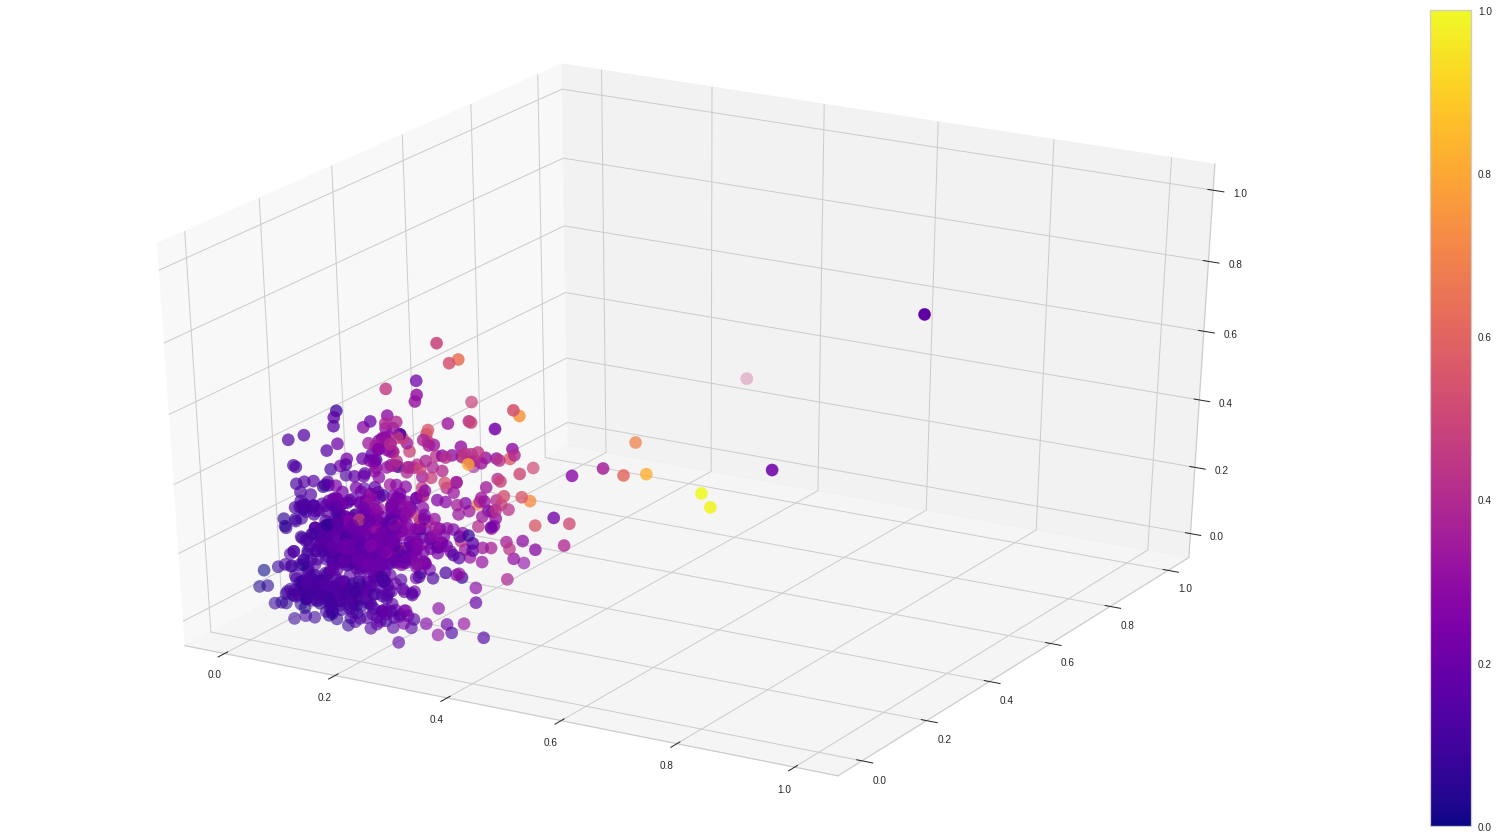

In [ ]:
f = plt.figure(figsize=(30, 15))
ax = f.add_subplot(projection='3d')

points = ax.scatter(train_data_df['GrLivArea'], train_data_df['LotArea'], train_data_df['GarageArea'], c=train_data_df['SalePrice'], s=150, cmap="plasma")
f.colorbar(points)

plt.show()

#### **Extrakcia príznaku ceny zo vzoriek:**

In [ ]:
train_target_df = train_data_df[['SalePrice']]
train_data_df = train_data_df.drop('SalePrice', axis=1)

train_target_df

SalePrice
0     0.138517
1     1.000000
2     0.369172
3     0.110032
4     0.163528
..         ...
935   0.076476
936   0.115590
937   0.249676
938   0.341678
939   0.193402

[940 rows x 1 columns]

#### **Redukcia dimenzie (PCA):**

In [ ]:
train_data_df

MSSubClass  LotFrontage   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0      0.411765     0.226027  0.037140     0.428571   0.715385      0.383333   
1      0.235294     0.284247  0.094580     0.571429   0.876923      0.750000   
2      0.235294     0.222603  0.042441     0.428571   0.815385      0.616667   
3      0.176471     0.106164  0.023090     0.571429   0.415385      0.000000   
4      0.000000     0.181507  0.033803     0.571429   0.569231      0.666667   
..          ...          ...       ...          ...        ...           ...   
935    0.058824     0.065068  0.013929     0.571429   0.253846      0.866667   
936    0.000000     0.136986  0.031050     0.428571   0.623077      0.183333   
937    0.000000     0.410959  0.142420     0.428571   0.615385      0.166667   
938    0.235294     0.229452  0.053121     0.428571   0.961538      0.933333   
939    0.294118     0.184932  0.050013     0.714286   0.469231      0.000000   

     MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0      0.352500    0.000000         0.0   0.708904     0.258285  0.286319   
1      0.731250    0.257796         0.0   0.423373     0.389509  0.471556   
2      0.107500    0.004961         1.0   0.000000     0.232639  0.262106   
3      0.000000    0.000000         0.0   0.349315     0.118401  0.088858   
4      0.406250    0.214918         0.0   0.035959     0.198501  0.201928   
..          ...         ...         ...        ...          ...       ...   
935    0.000000    0.064670         0.0   0.032106     0.055787  0.060179   
936    0.120000    0.159993         0.0   0.053938     0.153872  0.138928   
937    0.070000    0.113218         0.0   0.188784     0.162365  0.286319   
938    0.153125    0.000000         0.0   0.468322     0.164696  0.163376   
939    0.000000    0.048724         0.0   0.183647     0.099750  0.099201   

     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0    0.000000      0.000000   0.234051           0.0           0.0  0.666667   
1    0.906538      0.000000   0.745196           0.0           0.5  1.000000   
2    0.569976      0.000000   0.440430           0.5           0.0  0.666667   
3    0.000000      0.629371   0.141814           0.0           0.0  0.333333   
4    0.000000      0.000000   0.165065           0.0           0.5  0.333333   
..        ...           ...        ...           ...           ...       ...   
935  0.000000      0.000000   0.049193           0.0           0.0  0.333333   
936  0.000000      0.000000   0.113566           0.5           0.0  0.333333   
937  0.000000      0.000000   0.234051           0.5           0.0  0.333333   
938  0.653269      0.000000   0.392775           0.0           0.0  0.666667   
939  0.340920      0.000000   0.216372           0.0           0.0  0.333333   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         0.0      0.666667           1.0      0.555556    0.000000   
1         0.5      0.666667           0.0      0.777778    0.666667   
2         0.5      0.666667           0.0      0.555556    0.333333   
3         0.0      0.500000           0.0      0.333333    0.333333   
4         0.0      0.500000           0.0      0.222222    0.333333   
..        ...           ...           ...           ...         ...   
935       0.0      0.333333           0.0      0.111111    0.333333   
936       0.0      0.500000           0.0      0.222222    0.000000   
937       0.0      0.500000           0.0      0.444444    0.666667   
938       0.5      0.666667           0.0      0.666667    0.333333   
939       0.5      0.500000           0.0      0.444444    0.333333   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       0.663636    0.333333    0.275040    0.000000     0.385740   
1       0.854545    0.666667    0.534181    0.445741     0.091408   
2       0.790909    0.333333    0.330684    0.234539     0.175503   
3       0.772727    0.333333 

In [ ]:
pca_model = PCA(n_components=3)

In [ ]:
train_data_pca = pca_model.fit_transform(train_data_df)
train_data_df = pd.DataFrame(train_data_pca)

train_data_df

0         1         2
0   -1.458723 -0.502452 -0.231503
1    1.520882 -0.634814  0.049074
2    0.756452 -0.857152 -0.708353
3   -1.838033  1.429104  0.220567
4   -1.114565 -1.601914  0.588844
..        ...       ...       ...
935 -1.177925  0.734779  0.337476
936 -1.043933 -0.842345  0.136271
937 -0.691441 -1.847915  0.945817
938  2.239251  0.497536 -0.054609
939 -1.268738  0.072543 -0.295542

[940 rows x 3 columns]

In [ ]:
explained_variance = pca_model.explained_variance_ratio_

explained_variance

array([0.17652113, 0.06160425, 0.03939058])

---
### **Testovacie dáta:**

In [ ]:
test_data_df

MSSubClass  LotFrontage  LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0            90         64.0     6979            5       1980          1980   
1            20         60.0     7180            7       1972          1972   
2            20         74.0     8536            5       2006          2007   
3            20         60.0     7200            7       1950          1950   
4           190         75.0    10382            5       1958          1958   
..          ...          ...      ...          ...        ...           ...   
149          20         88.0     7990            6       1975          1975   
150          60         77.0     9206            5       1985          1985   
151         120         40.0     4671            5       1988          1989   
152          20         80.0     9600            5       1969          1969   
153          80         85.0    10200            5       1988          1989   

     MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0           0.0        1056           0          0         1056      1056   
1           0.0         390           0        474          864       864   
2           0.0           0           0       1125         1125      1125   
3           0.0         534          96        246          876       988   
4         105.0         513           0         75          588      1095   
..          ...         ...         ...        ...          ...       ...   
149         0.0           0           0        924          924       924   
150       336.0           0           0        741          741       977   
151         0.0         767           0        461         1228      1228   
152       168.0           0           0       1164         1164      1164   
153       219.0         783           0        678         1461      1509   

     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0           0             0       1056             2             0         0   
1           0             0        864             0             0         1   
2           0             0       1125             0             0         1   
3           0             0        988             0             0         1   
4           0             0       1095             1             0         1   
..        ...           ...        ...           ...           ...       ...   
149         0             0        924             0             0         1   
150       755             0       1732             0             0         2   
151         0             0       1228             1             0         2   
152         0             0       1164             0             0         1   
153         0             0       1509             1             0         2   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0           0             0             2             4           0   
1           0             3             1             5           0   
2           1             2             1             5           0   
3           0             3             1             6           0   
4           0             2             1             6           0   
..        ...           ...           ...           ...         ...   
149         0             3             1             5           0   
150         1             3             1             7           1   
151         0             2             1             5           1   
152         1             3             1             6           0   
153         0             3             1             5           1   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         1980.0           2         576         264           56   
1         1989.0           1         352           0            0   
2         2007.0           2         430          80           64   
3         1950.0           1         276 

In [ ]:
test_data_np_scaled = model.transform(test_data_df.values)

test_data_df = pd.DataFrame(data=test_data_np_scaled, columns=test_data_df.columns)

In [ ]:
test_target_df = test_data_df[['SalePrice']]
test_data_df = test_data_df.drop('SalePrice', axis=1)

test_target_df

SalePrice
0     0.151022
1     0.127401
2     0.166307
3     0.116285
4     0.145464
..         ...
149   0.103780
150   0.198265
151   0.213549
152   0.145464
153   0.194096

[154 rows x 1 columns]

In [ ]:
test_data_pca = pca_model.transform(test_data_df)
test_data_df = pd.DataFrame(test_data_pca)

test_data_df

0         1         2
0   -1.682671 -0.008629 -0.158492
1   -1.490981 -1.060354  0.335351
2    0.328287  0.465907  0.469561
3   -2.001889 -1.064000 -0.083151
4   -1.145185 -2.009893 -0.286176
..        ...       ...       ...
149 -1.181005 -0.415118 -0.119352
150  0.480856 -0.331081 -1.553650
151  1.269580 -0.437594 -0.217270
152 -1.301512 -1.374370  0.166591
153  1.132621 -0.996142 -0.710691

[154 rows x 3 columns]

## **Rozhodovací strom (DT):**

In [ ]:
dt_model = DecisionTreeRegressor().fit(train_data_df, train_target_df)

In [ ]:
train_pred_df = dt_model.predict(train_data_df)
test_pred_df = dt_model.predict(test_data_df)

In [ ]:
print("MSE: ", metrics.mean_squared_error(train_target_df, train_pred_df))
print("R2: ", metrics.r2_score(train_target_df, train_pred_df))

MSE:  0.0
R2:  1.0


In [ ]:
print("MSE: ", metrics.mean_squared_error(test_target_df, test_pred_df))
print("R2: ", metrics.r2_score(test_target_df, test_pred_df))

MSE:  0.007139150898910286
R2:  0.3782669504234005


In [ ]:
parameters={
    'max_depth' : range(1, 50),
    'max_leaf_nodes' : [None,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    }

In [ ]:
reg_decision_model=DecisionTreeRegressor()

grid_model=GridSearchCV(
    estimator=reg_decision_model, 
    param_grid=parameters,
    cv=5,
    verbose=3)

In [ ]:
grid_model.fit(train_data_df, train_target_df)

Výstup streamovania bol skrátený na tento počet posledných riadkov: 5000.
[CV 1/5] END ....max_depth=2, max_leaf_nodes=40;, score=0.412 total time=   0.0s
[CV 2/5] END ....max_depth=2, max_leaf_nodes=40;, score=0.519 total time=   0.0s
[CV 3/5] END ....max_depth=2, max_leaf_nodes=40;, score=0.450 total time=   0.0s
[CV 4/5] END ....max_depth=2, max_leaf_nodes=40;, score=0.546 total time=   0.0s
[CV 5/5] END ....max_depth=2, max_leaf_nodes=40;, score=0.592 total time=   0.0s
[CV 1/5] END ....max_depth=2, max_leaf_nodes=45;, score=0.412 total time=   0.0s
[CV 2/5] END ....max_depth=2, max_leaf_nodes=45;, score=0.519 total time=   0.0s
[CV 3/5] END ....max_depth=2, max_leaf_nodes=45;, score=0.450 total time=   0.0s
[CV 4/5] END ....max_depth=2, max_leaf_nodes=45;, score=0.546 total time=   0.0s
[CV 5/5] END ....max_depth=2, max_leaf_nodes=45;, score=0.592 total time=   0.0s
[CV 1/5] END ....max_depth=2, max_leaf_nodes=50;, score=0.412 total time=   0.0s
[CV 2/5] END ....max_depth=2, max_l

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 50),
                         'max_leaf_nodes': [None, 5, 10, 15, 20, 25, 30, 35, 40,
                                            45, 50, 55, 60, 65, 70, 75, 80, 85,
                                            90, 95, 100]},
             verbose=3)

In [ ]:
grid_model.best_params_

{'max_depth': 2, 'max_leaf_nodes': None}

In [ ]:
train_pred_df = grid_model.best_estimator_.predict(train_data_df)
test_pred_df = grid_model.best_estimator_.predict(test_data_df)

In [ ]:
print("MSE: ", metrics.mean_squared_error(train_target_df, train_pred_df))
print("R2: ", metrics.r2_score(train_target_df, train_pred_df))

MSE:  0.006258880498674943
R2:  0.5413095146723974


In [ ]:
print("MSE: ", metrics.mean_squared_error(test_target_df, test_pred_df))
print("R2: ", metrics.r2_score(test_target_df, test_pred_df))

MSE:  0.005052777741417347
R2:  0.5599646290592228


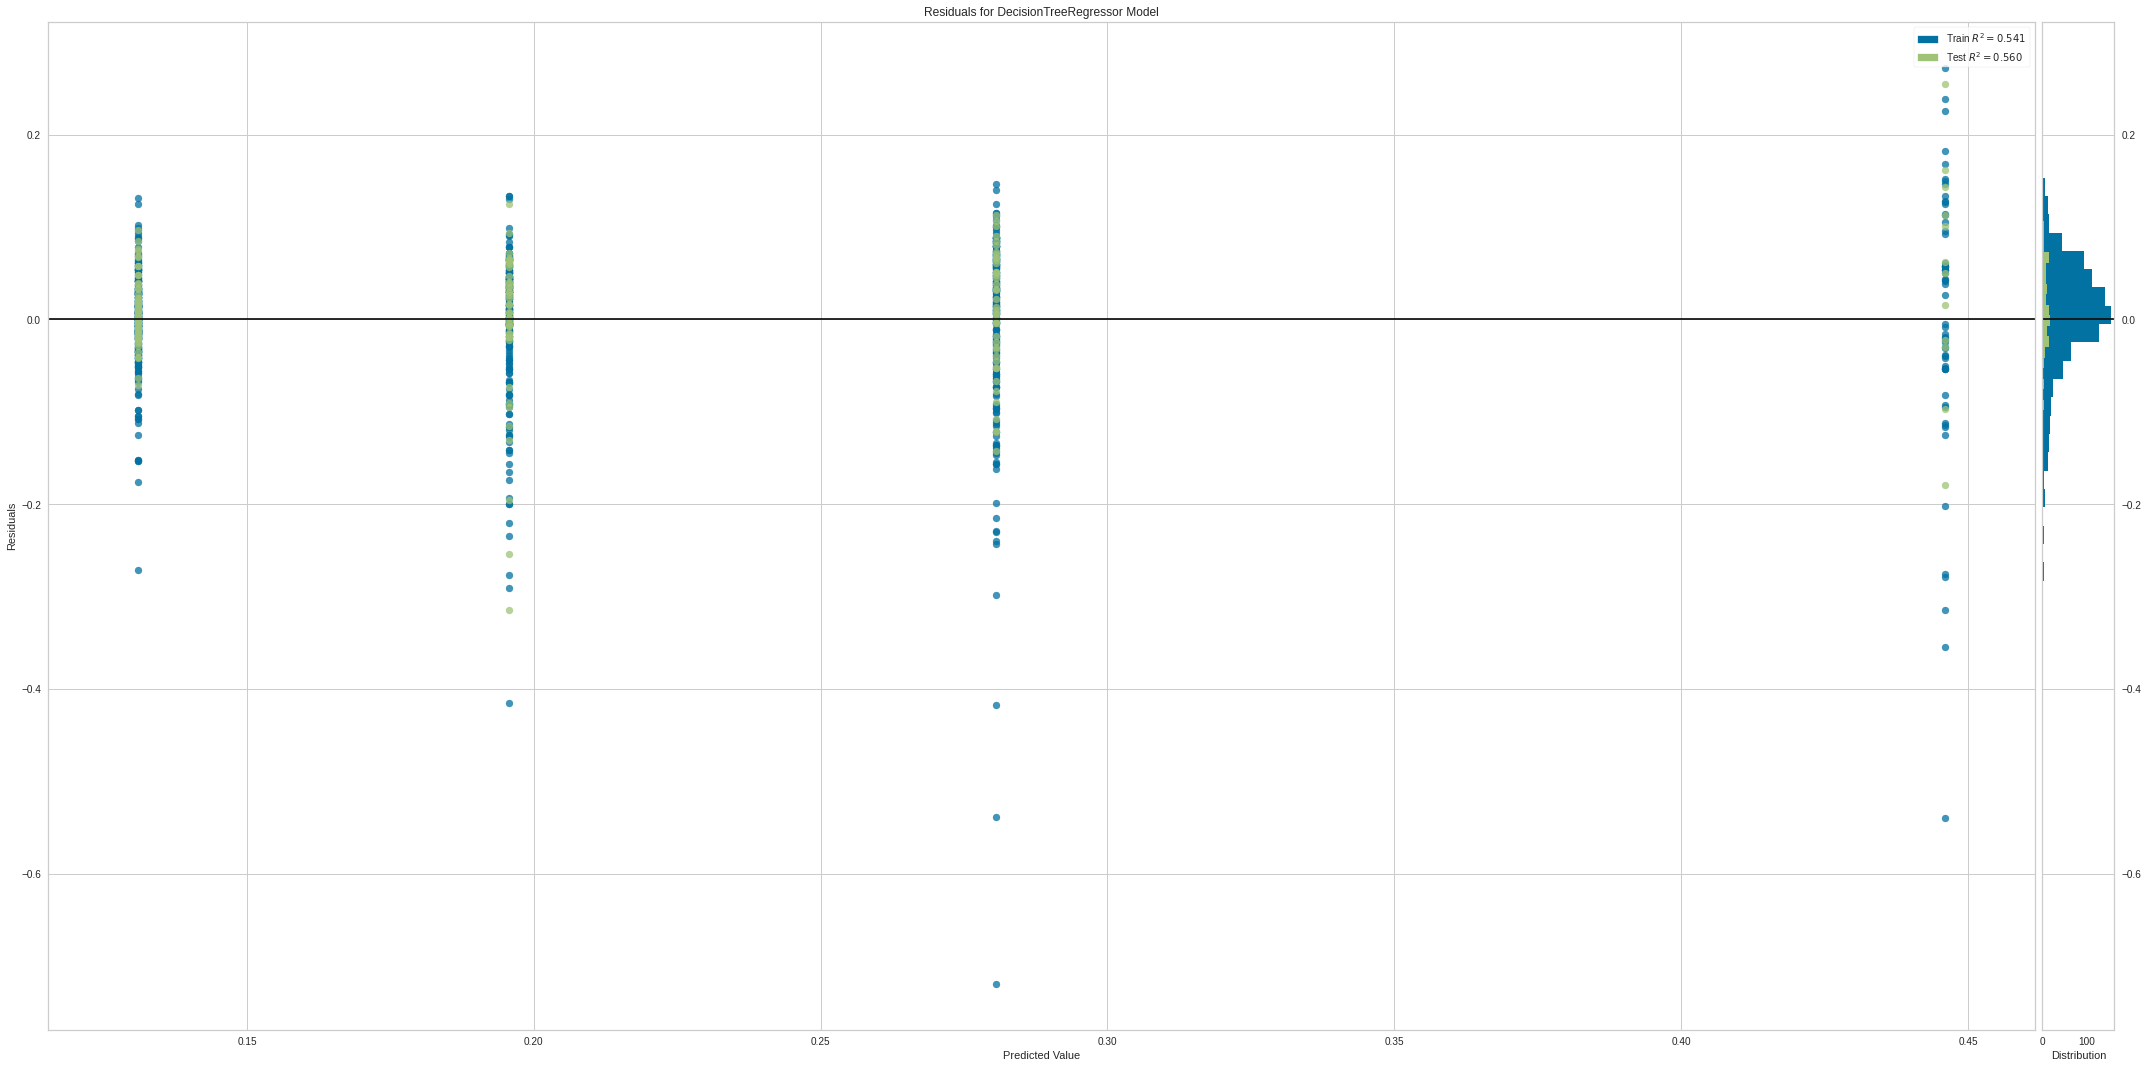

In [ ]:
plt.figure(figsize=(30, 15))
visualizer = ResidualsPlot(grid_model.best_estimator_, hist=True, qqplot=False)
visualizer.fit(train_data_df, train_target_df.values.ravel())
visualizer.score(test_data_df, test_target_df.values.ravel())
visualizer.show()

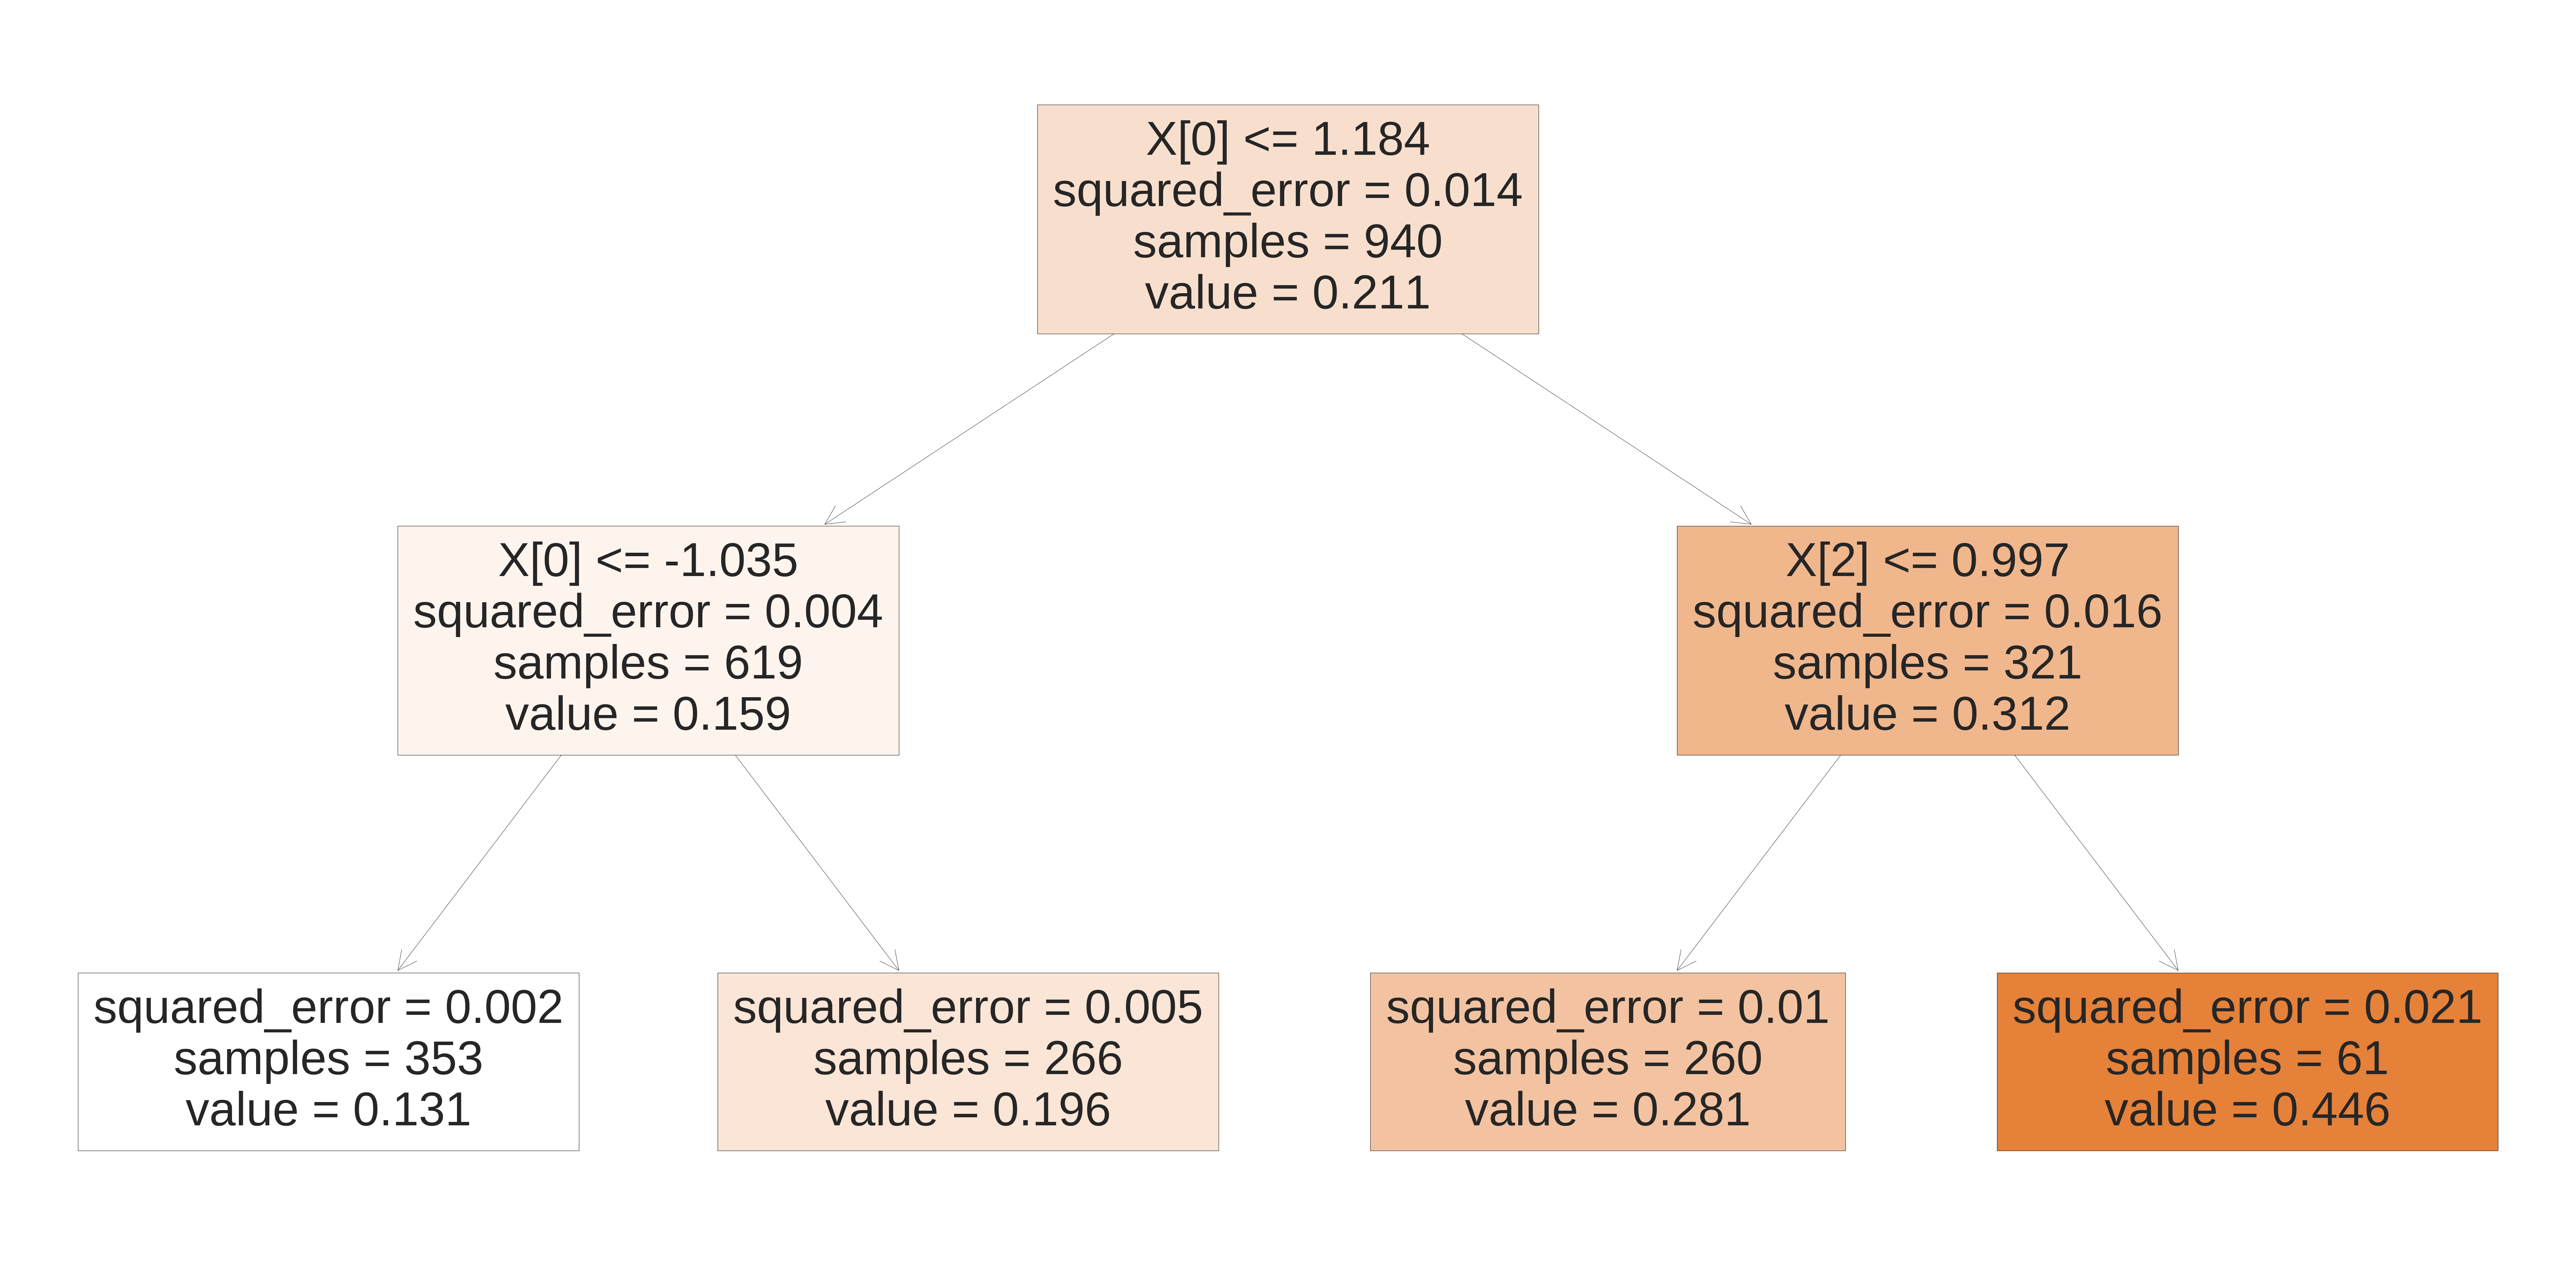

In [ ]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30, 15), dpi=300)
tree.plot_tree(grid_model.best_estimator_, filled = True)
plt.show()

## **Stroje s podpornými vektormi (SVM):**

In [ ]:
svr_model = SVR().fit(train_data_df, train_target_df.values.ravel())

In [ ]:
train_pred_df = svr_model.predict(train_data_df)
test_pred_df = svr_model.predict(test_data_df)

In [ ]:
print("MSE: ", metrics.mean_squared_error(train_target_df, train_pred_df))
print("R2: ", metrics.r2_score(train_target_df, train_pred_df))

MSE:  0.006066877951235351
R2:  0.555380679905197


In [ ]:
print("MSE: ", metrics.mean_squared_error(test_target_df, test_pred_df))
print("R2: ", metrics.r2_score(test_target_df, test_pred_df))

MSE:  0.004639454134670909
R2:  0.5959600786754632


In [ ]:
parameters = {
    'kernel':['linear', 'rbf'],
    'gamma':['scale'],
    'C':[0.01,0.05,0.1,0.5,1,2,5],
    'epsilon':[0.1,0.2,0.5,1]
    }

In [ ]:
reg_decision_model = SVR()

grid_model = GridSearchCV(
    estimator=reg_decision_model, 
    param_grid=parameters,
    cv=5,
    verbose=3)

In [ ]:
grid_model.fit(train_data_df, train_target_df.values.ravel())

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=linear;, score=0.406 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=linear;, score=0.494 total time=   0.0s
[CV 3/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=linear;, score=0.464 total time=   0.0s
[CV 4/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=linear;, score=0.488 total time=   0.0s
[CV 5/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=linear;, score=0.574 total time=   0.0s
[CV 1/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.389 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.477 total time=   0.0s
[CV 3/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.427 total time=   0.0s
[CV 4/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.452 total time=   0.0s
[CV 5/5] END C=0.01, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.535 total time=   0.0s
[CV 1/5] END 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1], 'gamma': ['scale'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
grid_model.best_params_

{'C': 0.5, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
train_pred_df = grid_model.best_estimator_.predict(train_data_df)
test_pred_df = grid_model.best_estimator_.predict(test_data_df)

In [ ]:
print("MSE: ", metrics.mean_squared_error(train_target_df, train_pred_df))
print("R2: ", metrics.r2_score(train_target_df, train_pred_df))

MSE:  0.006144919568369268
R2:  0.5496612949055177


In [ ]:
print("MSE: ", metrics.mean_squared_error(test_target_df, test_pred_df))
print("R2: ", metrics.r2_score(test_target_df, test_pred_df))

MSE:  0.004753306867088431
R2:  0.5860448930279125


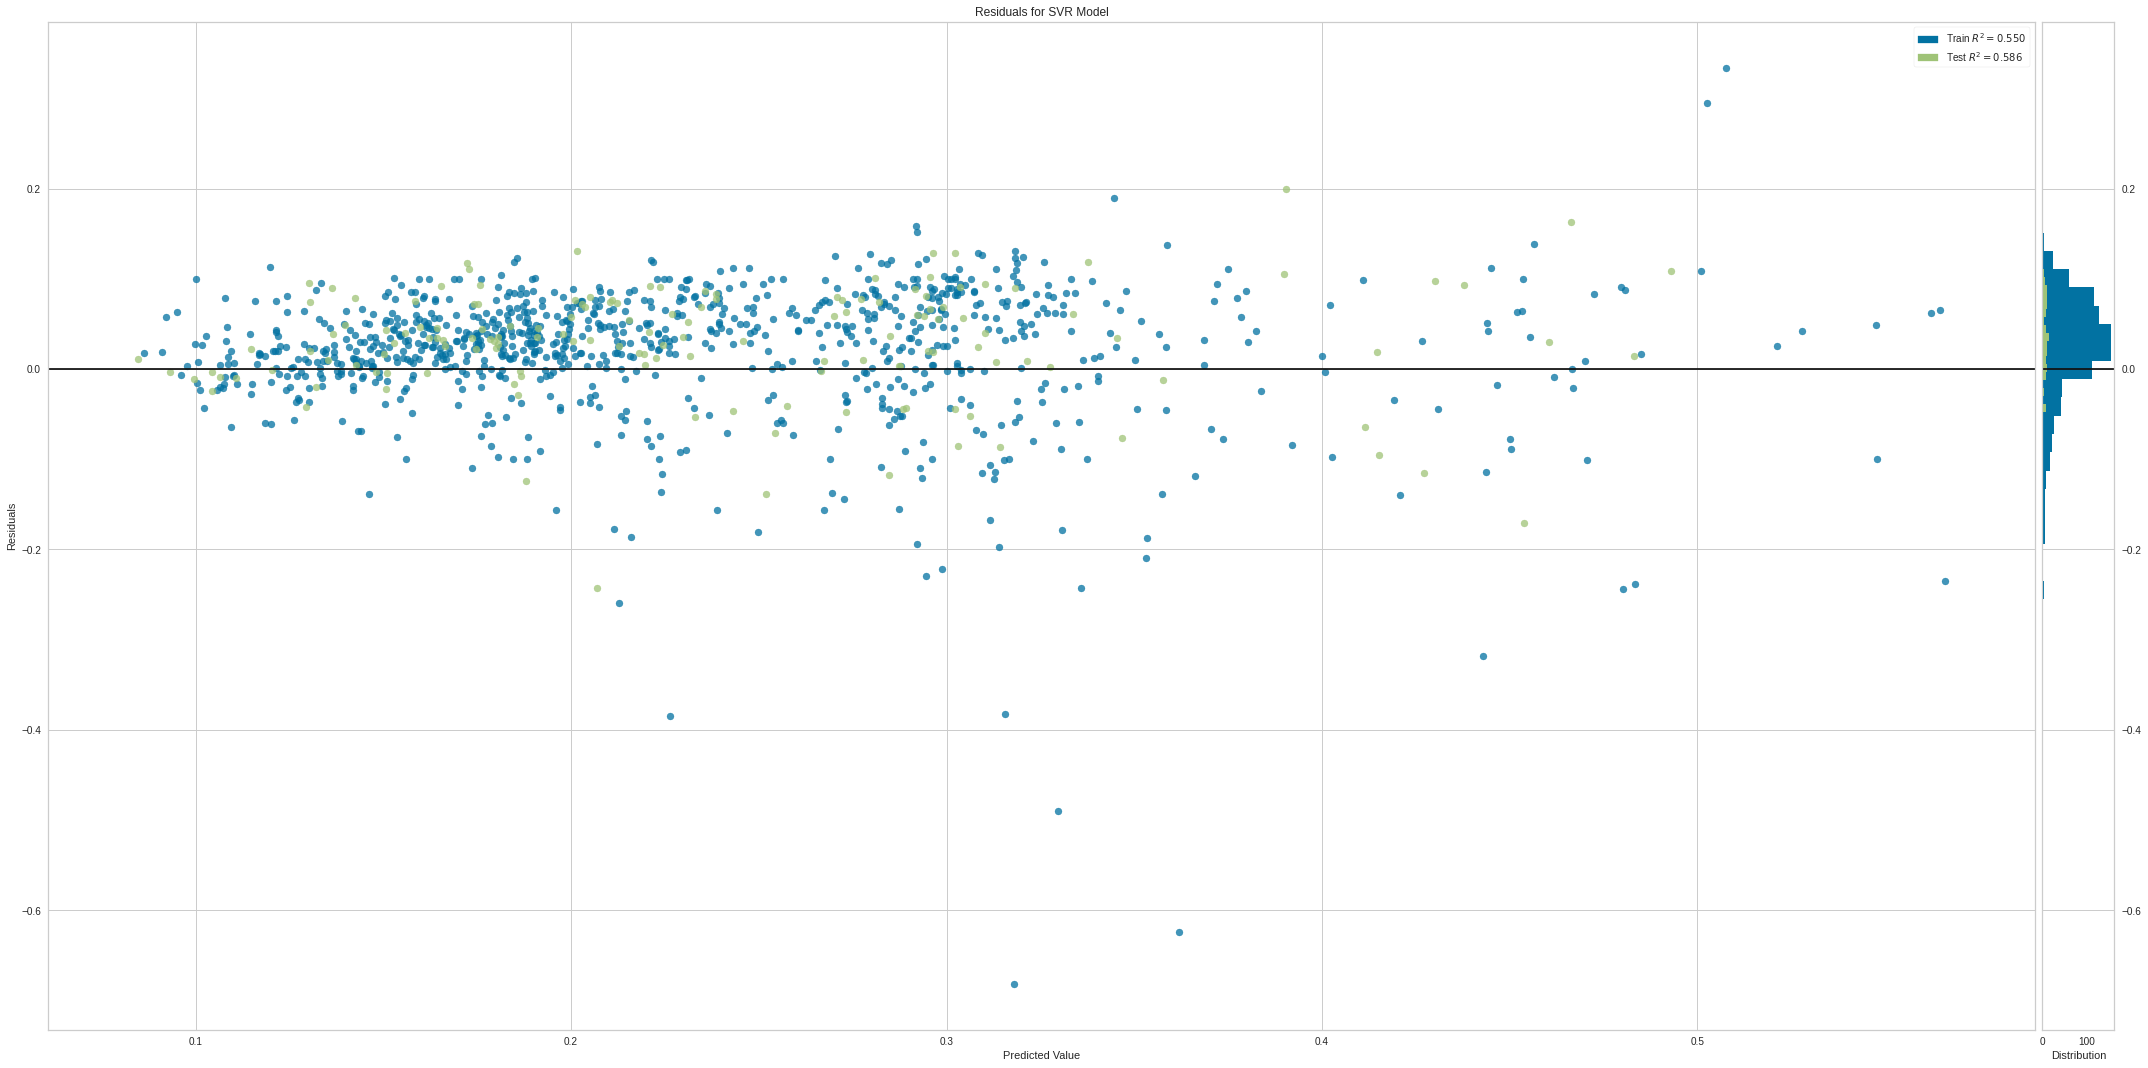

In [ ]:
plt.figure(figsize=(30, 15))
visualizer = ResidualsPlot(grid_model.best_estimator_, hist=True, qqplot=False)
visualizer.fit(train_data_df, train_target_df.values.ravel())
visualizer.score(test_data_df, test_target_df.values.ravel())
visualizer.show()

## **Náhodný les (RF):**

In [ ]:
rf_model = RandomForestRegressor().fit(train_data_df, train_target_df.values.ravel())

In [ ]:
train_pred_df = rf_model.predict(train_data_df)
test_pred_df = rf_model.predict(test_data_df)

In [ ]:
print("MSE: ", metrics.mean_squared_error(train_target_df, train_pred_df))
print("R2: ", metrics.r2_score(train_target_df, train_pred_df))

MSE:  0.000912352985484491
R2:  0.933136982917222


In [ ]:
print("MSE: ", metrics.mean_squared_error(test_target_df, test_pred_df))
print("R2: ", metrics.r2_score(test_target_df, test_pred_df))

MSE:  0.004280974585876321
R2:  0.6271792791432559


In [ ]:
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 100, 1000]
}

In [ ]:
reg_decision_model = RandomForestRegressor()

grid_model = GridSearchCV(
    estimator=reg_decision_model, 
    param_grid=parameters,
    cv=5,
    verbose=3)

In [ ]:
grid_model.fit(train_data_df, train_target_df.values.ravel())

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=0.436 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=0.547 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=0.564 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=0.628 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10;, score=0.564 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.430 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=80

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 100, 1000]},
             verbose=3)

In [ ]:
grid_model.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [ ]:
train_pred_df = grid_model.best_estimator_.predict(train_data_df)
test_pred_df = grid_model.best_estimator_.predict(test_data_df)

In [ ]:
print("MSE: ", metrics.mean_squared_error(train_target_df, train_pred_df))
print("R2: ", metrics.r2_score(train_target_df, train_pred_df))

MSE:  0.0032308402057774303
R2:  0.7632235249869808


In [ ]:
print("MSE: ", metrics.mean_squared_error(test_target_df, test_pred_df))
print("R2: ", metrics.r2_score(test_target_df, test_pred_df))

MSE:  0.004244204393255205
R2:  0.6303815148594578


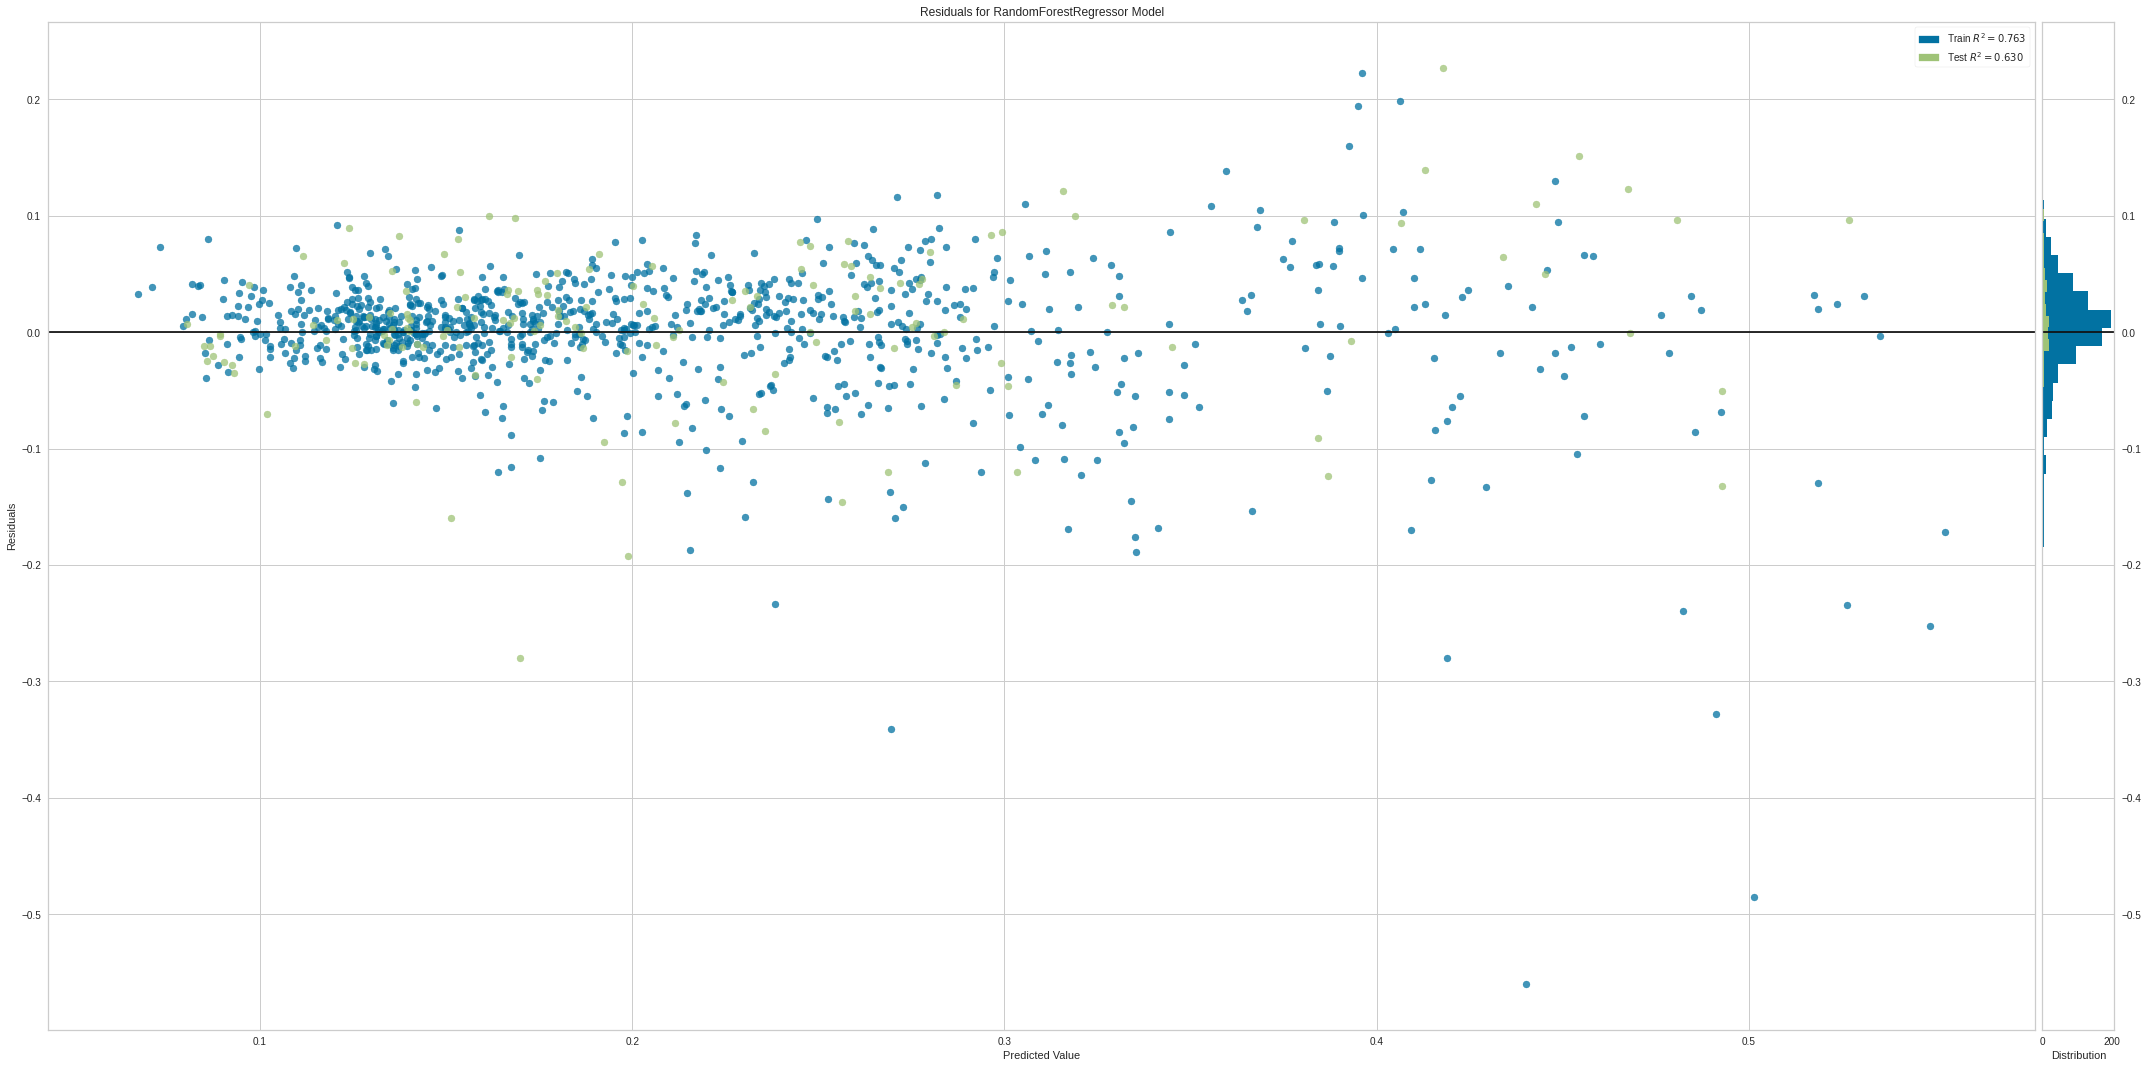

In [ ]:
plt.figure(figsize=(30, 15))
visualizer = ResidualsPlot(grid_model.best_estimator_, hist=True, qqplot=False)
visualizer.fit(train_data_df, train_target_df.values.ravel())
visualizer.score(test_data_df, test_target_df.values.ravel())
visualizer.show()

## **Zhlukovanie (DBSCAN):**

In [ ]:
dbscan_model = DBSCAN(eps=0.3)

In [ ]:
train_pred_df = dbscan_model.fit_predict(train_data_df)
test_pred_df = dbscan_model.fit_predict(test_data_df)

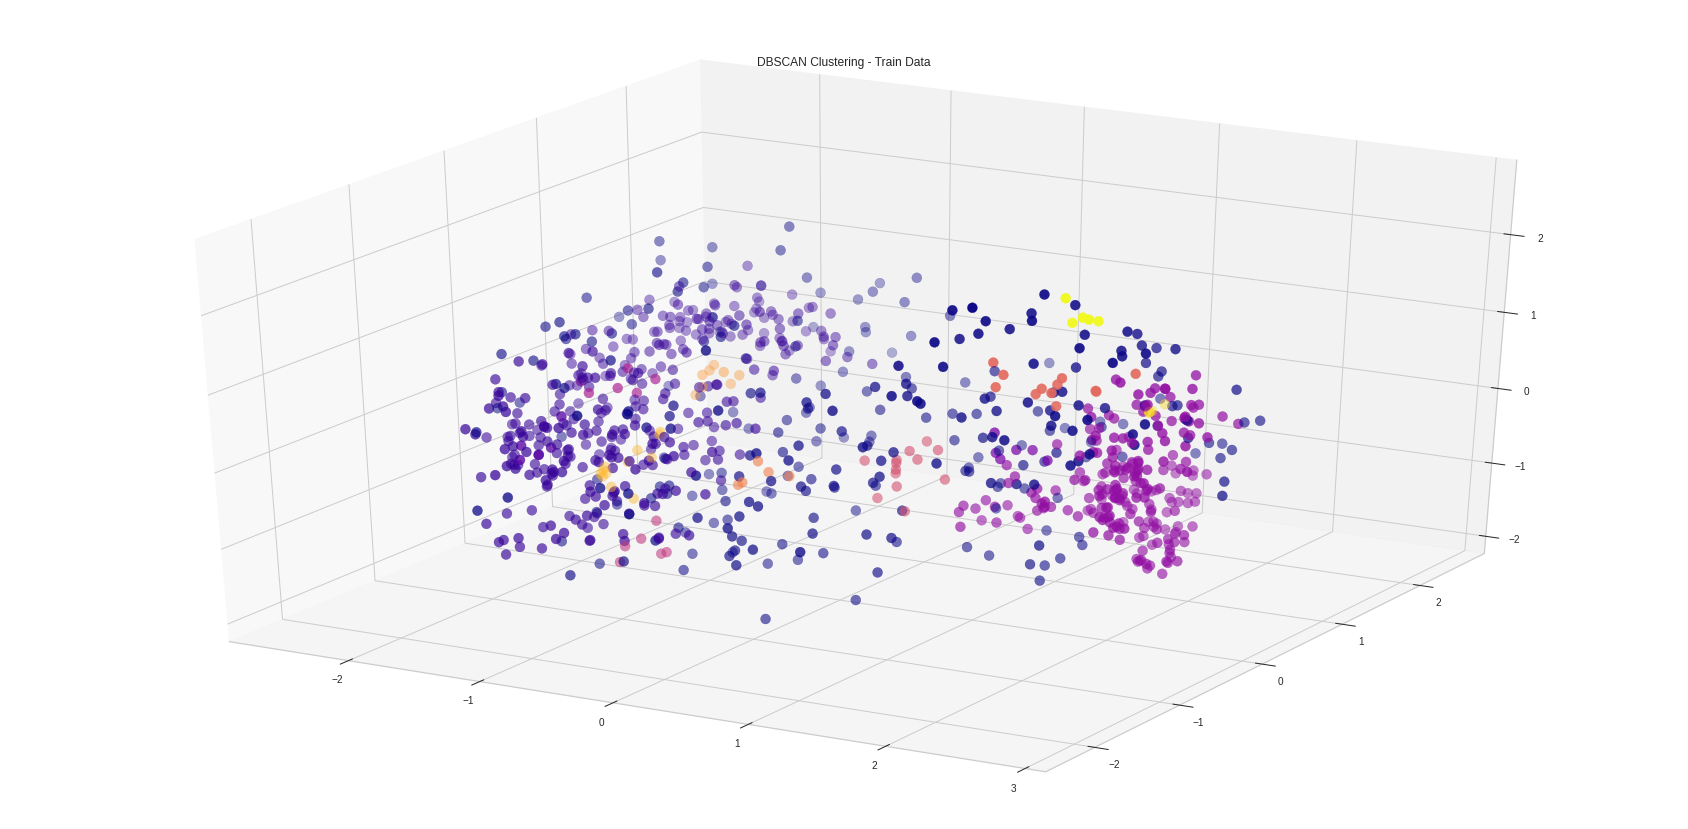

In [ ]:
f = plt.figure(figsize=(30, 15))
ax = f.add_subplot(projection='3d')

ax.scatter(train_data_df[0], train_data_df[1], train_data_df[2],
                     c=train_pred_df, s=100, cmap='plasma')

ax.set_title('DBSCAN Clustering - Train Data')

plt.show()

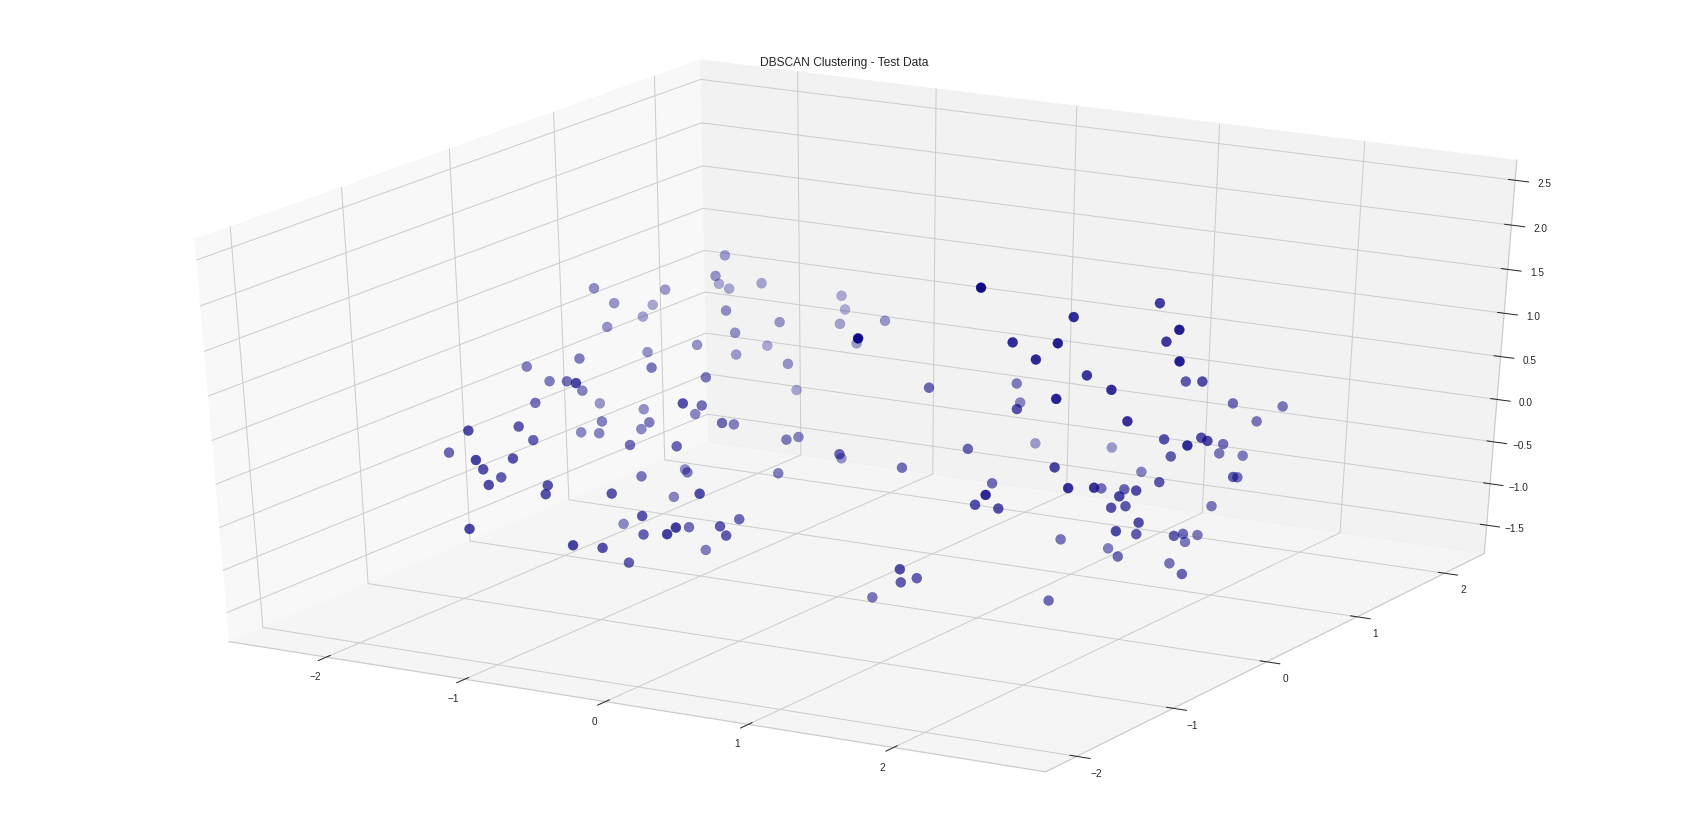

In [ ]:
f = plt.figure(figsize=(30, 15))
ax = f.add_subplot(projection='3d')

ax.scatter(test_data_df[0], test_data_df[1], test_data_df[2],
                     c=test_pred_df, s=100, cmap='plasma')

ax.set_title('DBSCAN Clustering - Test Data')

plt.show()

## **Zhlukovanie (KMEANS):**

In [ ]:
kmeans_model = KMeans()

In [ ]:
train_pred_df = kmeans_model.fit_predict(train_data_df)
test_pred_df = kmeans_model.fit_predict(test_data_df)

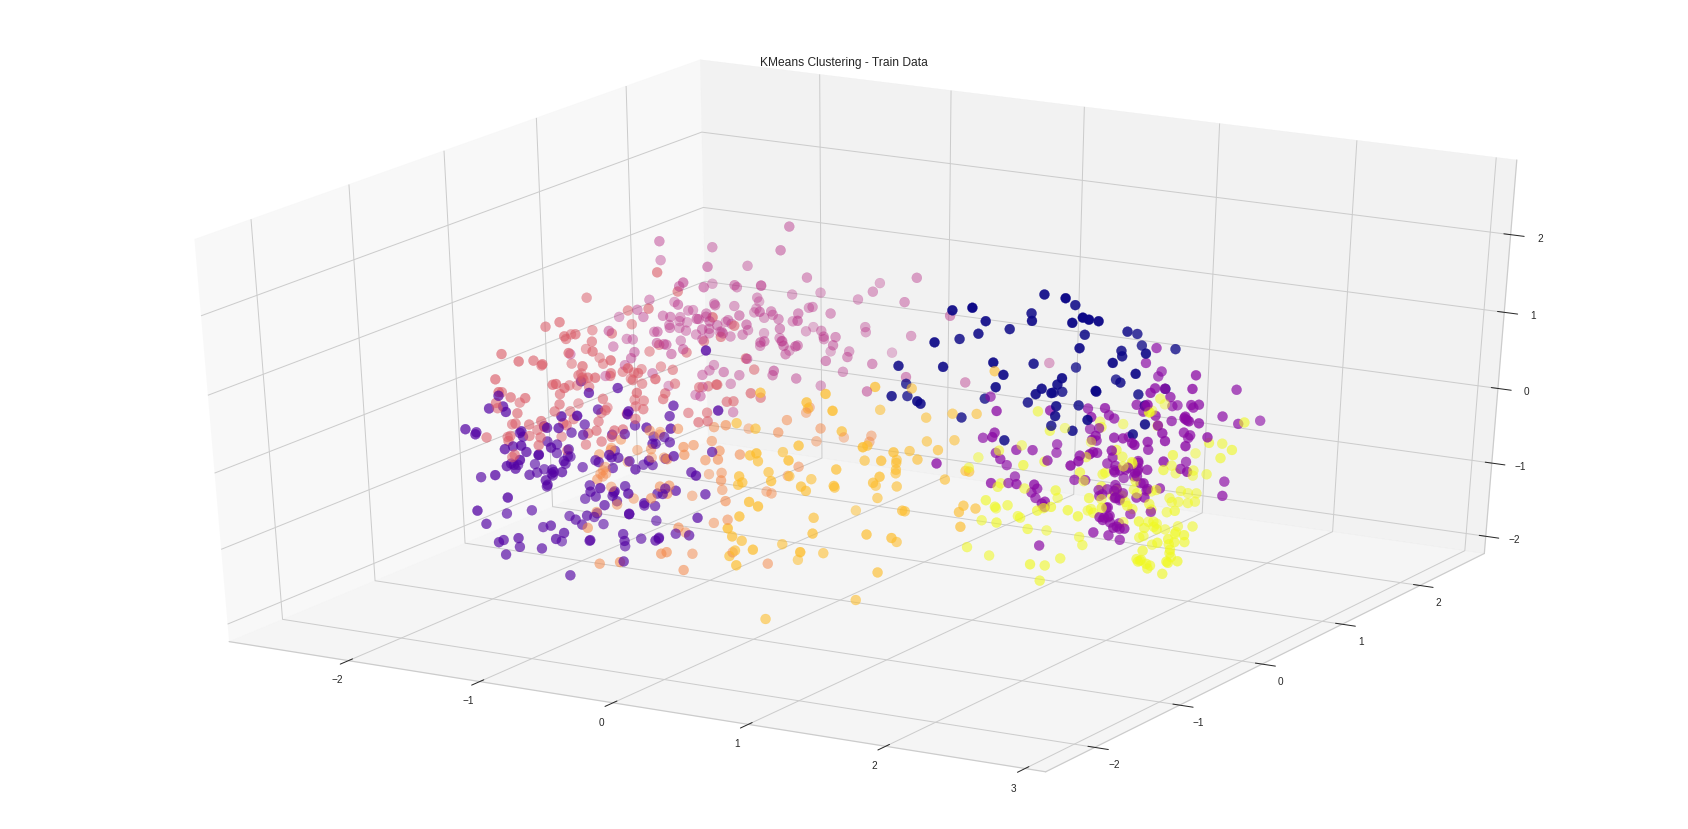

In [ ]:
f = plt.figure(figsize=(30, 15))
ax = f.add_subplot(projection='3d')

ax.scatter(train_data_df[0], train_data_df[1], train_data_df[2],
                     c=train_pred_df, s=100, cmap='plasma')

ax.set_title('KMeans Clustering - Train Data')

plt.show()

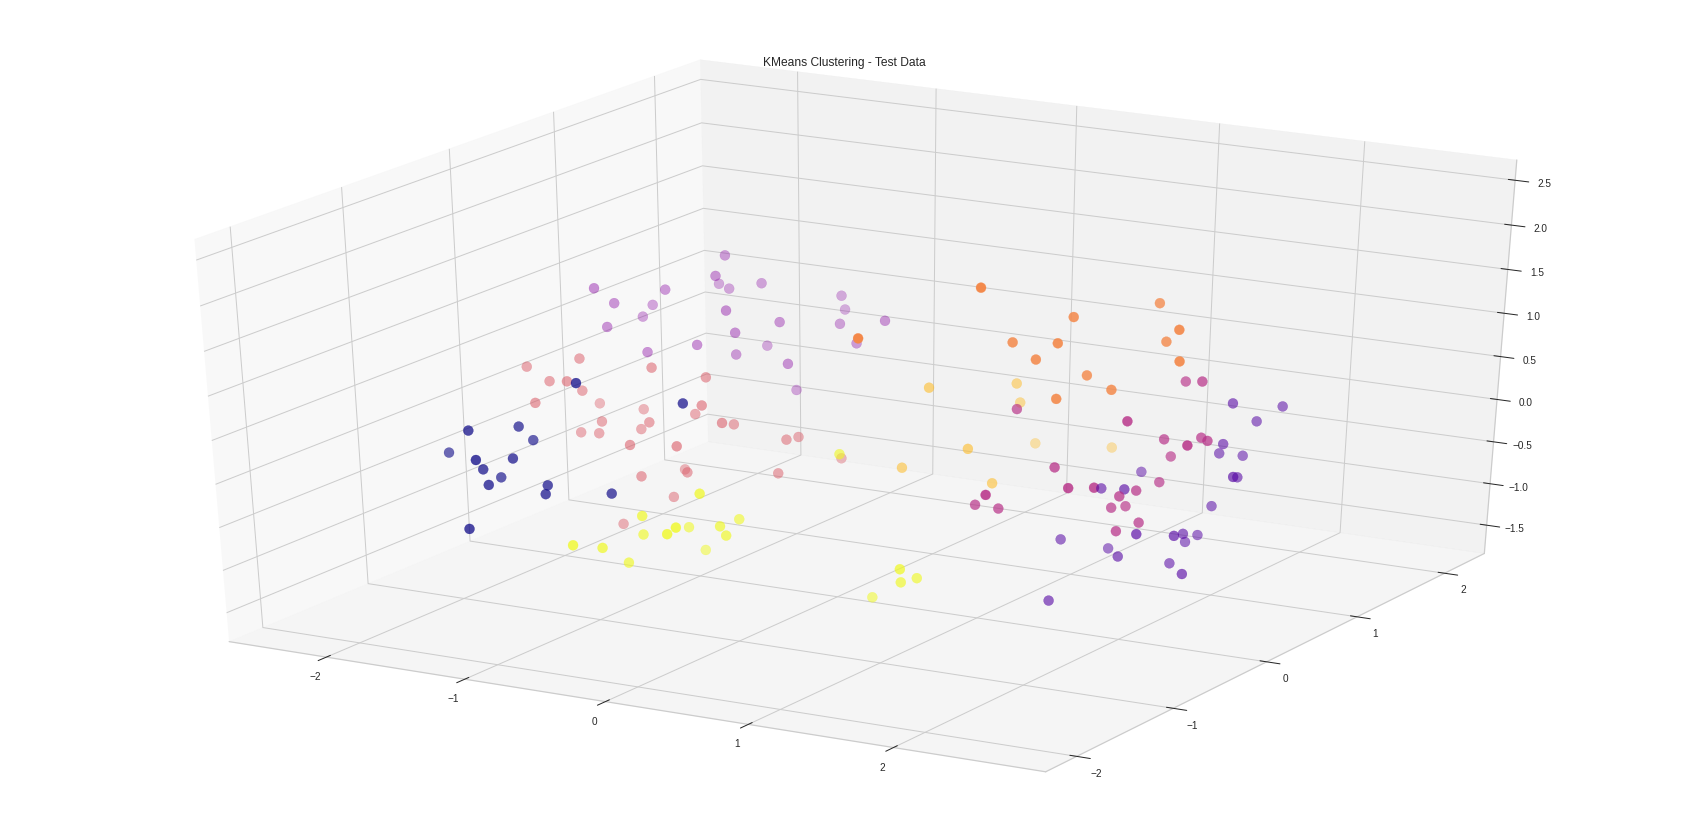

In [ ]:
f = plt.figure(figsize=(30, 15))
ax = f.add_subplot(projection='3d')

ax.scatter(test_data_df[0], test_data_df[1], test_data_df[2],
                     c=test_pred_df, s=100, cmap='plasma')

ax.set_title('KMeans Clustering - Test Data')

plt.show()